## ECE-GY 9163: Machine Learning for Cyber Security
# Lab 4

#### Chandana Thimmalapura Jagadeeshaiah
#### ct3002

### Designing a backdoor detector for BadNets trained on the YouTube Face dataset using the pruning defense.

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import sys
import h5py
import warnings
from tqdm import tqdm

We create arrays to hold the validation/test data for both clean and badnet scenarios.

In [2]:
clean_data_path = '/kaggle/input/mlcybersec/lab3/data/cl/valid.h5'
poisoned_data_path = '/kaggle/input/mlcybersec/lab3/data/bd/bd_valid.h5'
model_path = '/kaggle/input/mlcybersec/lab3/model/bd_net.h5'

Define function to load the data

In [3]:
def load_data(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0, 2, 3, 1))
    return x_data, y_data

Visualizing the clean validation data and the sunglasses poisioned validation data

In [4]:
def visualize_samples(x_data, y_data, title):
    figure = plt.figure(figsize=(10, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        index = np.random.randint(x_data.shape[0], size=1)
        img, label = x_data[index], y_data[index]
        figure.add_subplot(rows, cols, i)
        plt.title("True label: {}".format(label))
        plt.axis("off")
        plt.imshow(img[0] / 255)
    plt.suptitle(title)
    plt.show()

361/361 [==============================] - 6s 16ms/step
Clean Classification accuracy: 98.64899974019225
361/361 [==============================] - 5s 15ms/step
Attack Success Rate: 100.0


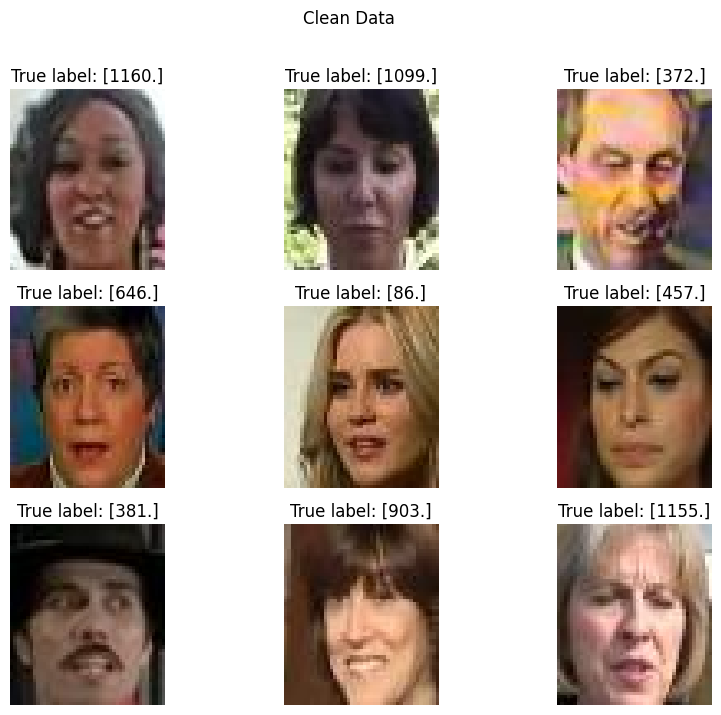

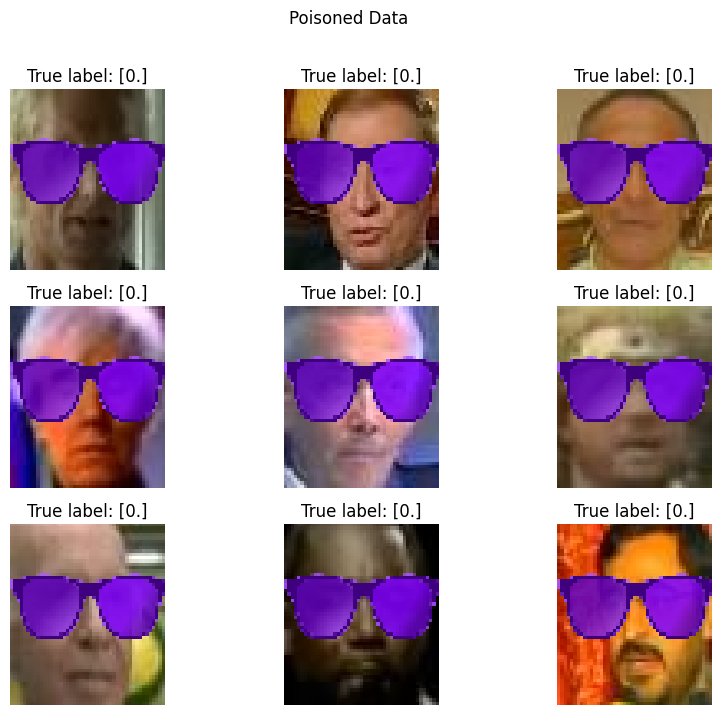

In [5]:
def main():
    # Load clean and poisoned data
    clean_x, clean_y = load_data(clean_data_path)
    poisoned_x, poisoned_y = load_data(poisoned_data_path)

    # Load the BadNet model
    badnet_model = keras.models.load_model(model_path)

    # Evaluate clean data
    clean_predictions = np.argmax(badnet_model.predict(clean_x), axis=1)
    clean_accuracy = np.mean(np.equal(clean_predictions, clean_y)) * 100
    print('Clean Classification accuracy:', clean_accuracy)

    # Evaluate poisoned data
    poisoned_predictions = np.argmax(badnet_model.predict(poisoned_x), axis=1)
    attack_success_rate = np.mean(np.equal(poisoned_predictions, poisoned_y)) * 100
    print('Attack Success Rate:', attack_success_rate)

    # Visualize clean and poisoned data
    visualize_samples(clean_x, clean_y, 'Clean Data')
    visualize_samples(poisoned_x, poisoned_y, 'Poisoned Data')

if __name__ == '__main__':
    main()

In [6]:
# clearing the session
keras.backend.clear_session()

Outputting the model structure

In [34]:
model = keras.models.load_model(model_path)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 55, 47, 3)]          0         []                            
                                                                                                  
 conv_1 (Conv2D)             (None, 52, 44, 20)           980       ['input[0][0]']               
                                                                                                  
 pool_1 (MaxPooling2D)       (None, 26, 22, 20)           0         ['conv_1[0][0]']              
                                                                                                  
 conv_2 (Conv2D)             (None, 24, 20, 40)           7240      ['pool_1[0][0]']              
                                                                                            

#### The pruning defense involves the following steps:

1. Evaluate the activations of the final pooling layer (pool_3).
2. Identify and prune the channel with the smallest average activation in the convolution layer (conv_3). In this layer, which consists of a total of 60 channels, the index to prune is determined based on the smallest average activation.






361/361 [==============================] - 5s 13ms/step


  0%|          | 0/60 [00:00<?, ?it/s]

361/361 [==============================] - 6s 16ms/step


  2%|▏         | 1/60 [00:22<22:14, 22.62s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 0
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 26


  3%|▎         | 2/60 [00:35<16:29, 17.05s/it]

361/361 [==============================] - 6s 15ms/step


  5%|▌         | 3/60 [00:49<14:34, 15.34s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 27
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 30


  7%|▋         | 4/60 [01:02<13:32, 14.51s/it]

361/361 [==============================] - 5s 14ms/step


  8%|▊         | 5/60 [01:20<14:21, 15.66s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 31
361/361 [==============================] - 5s 15ms/step


 10%|█         | 6/60 [01:37<14:47, 16.44s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 33
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 34


 12%|█▏        | 7/60 [01:50<13:30, 15.30s/it]

361/361 [==============================] - 5s 15ms/step


 13%|█▎        | 8/60 [02:08<13:58, 16.13s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 36
361/361 [==============================] - 6s 16ms/step


 15%|█▌        | 9/60 [02:22<13:00, 15.30s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 37
361/361 [==============================] - 5s 15ms/step


 17%|█▋        | 10/60 [02:40<13:33, 16.27s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 38
361/361 [==============================] - 5s 15ms/step


 18%|█▊        | 11/60 [02:53<12:31, 15.33s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 25
361/361 [==============================] - 5s 15ms/step


 20%|██        | 12/60 [03:07<11:48, 14.75s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 39
361/361 [==============================] - 5s 14ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 41


 22%|██▏       | 13/60 [03:20<11:07, 14.20s/it]

361/361 [==============================] - 5s 14ms/step


 23%|██▎       | 14/60 [03:38<11:42, 15.27s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 44
361/361 [==============================] - 5s 14ms/step


 25%|██▌       | 15/60 [04:00<13:06, 17.47s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 45
361/361 [==============================] - 6s 16ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 47


 27%|██▋       | 16/60 [04:14<11:55, 16.26s/it]

361/361 [==============================] - 5s 15ms/step


 28%|██▊       | 17/60 [04:32<12:01, 16.77s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 48
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 49


 30%|███       | 18/60 [04:46<11:09, 15.94s/it]

361/361 [==============================] - 5s 15ms/step


 32%|███▏      | 19/60 [04:59<10:20, 15.12s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 50
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 53


 33%|███▎      | 20/60 [05:17<10:36, 15.92s/it]

361/361 [==============================] - 5s 15ms/step


 35%|███▌      | 21/60 [05:34<10:42, 16.48s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 55
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 40


 37%|███▋      | 22/60 [05:47<09:46, 15.44s/it]

361/361 [==============================] - 5s 15ms/step


 38%|███▊      | 23/60 [06:05<09:56, 16.12s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 24
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 59


 40%|████      | 24/60 [06:18<09:08, 15.23s/it]

361/361 [==============================] - 5s 15ms/step


 42%|████▏     | 25/60 [06:36<09:23, 16.09s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 9
361/361 [==============================] - 5s 15ms/step


 43%|████▎     | 26/60 [06:54<09:26, 16.65s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 2
361/361 [==============================] - 5s 15ms/step


 45%|████▌     | 27/60 [07:12<09:19, 16.94s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 12
361/361 [==============================] - 5s 15ms/step


 47%|████▋     | 28/60 [07:30<09:09, 17.18s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 13
361/361 [==============================] - 6s 16ms/step


 48%|████▊     | 29/60 [07:43<08:16, 16.01s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 17
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 14


 50%|█████     | 30/60 [07:56<07:33, 15.11s/it]

361/361 [==============================] - 5s 14ms/step


 52%|█████▏    | 31/60 [08:09<06:58, 14.43s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 15
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 23


 53%|█████▎    | 32/60 [08:22<06:36, 14.15s/it]

361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 6


 55%|█████▌    | 33/60 [08:35<06:12, 13.80s/it]

361/361 [==============================] - 6s 16ms/step


 57%|█████▋    | 34/60 [08:49<05:55, 13.67s/it]


The clean accuracy is: 98.64033948211657
The attack success rate is: 100.0
The pruned channel index is: 51
361/361 [==============================] - 5s 14ms/step

The clean accuracy is: 98.64033948211657
The attack success rate is: 100.0
The pruned channel index is: 32


 58%|█████▊    | 35/60 [09:01<05:35, 13.41s/it]

361/361 [==============================] - 5s 14ms/step


 60%|██████    | 36/60 [09:14<05:17, 13.24s/it]


The clean accuracy is: 98.63167922404088
The attack success rate is: 100.0
The pruned channel index is: 22
361/361 [==============================] - 6s 15ms/step


 62%|██████▏   | 37/60 [09:28<05:06, 13.34s/it]


The clean accuracy is: 98.65765999826795
The attack success rate is: 100.0
The pruned channel index is: 21
361/361 [==============================] - 5s 14ms/step


 63%|██████▎   | 38/60 [09:45<05:22, 14.65s/it]


The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 20
361/361 [==============================] - 5s 14ms/step


 65%|██████▌   | 39/60 [10:03<05:26, 15.55s/it]


The clean accuracy is: 98.6056984498138
The attack success rate is: 100.0
The pruned channel index is: 19
361/361 [==============================] - 5s 15ms/step

The clean accuracy is: 98.57105741751104
The attack success rate is: 100.0
The pruned channel index is: 43


 67%|██████▋   | 40/60 [10:16<04:55, 14.79s/it]

361/361 [==============================] - 5s 15ms/step


 68%|██████▊   | 41/60 [10:30<04:33, 14.39s/it]


The clean accuracy is: 98.53641638520828
The attack success rate is: 100.0
The pruned channel index is: 58
361/361 [==============================] - 5s 15ms/step


 70%|███████   | 42/60 [10:47<04:37, 15.42s/it]


The clean accuracy is: 98.19000606218066
The attack success rate is: 100.0
The pruned channel index is: 3
361/361 [==============================] - 5s 15ms/step


 72%|███████▏  | 43/60 [11:10<04:58, 17.57s/it]


The clean accuracy is: 97.65307006148784
The attack success rate is: 100.0
The pruned channel index is: 42
361/361 [==============================] - 5s 14ms/step

The clean accuracy is: 97.50584567420108
The attack success rate is: 100.0
The pruned channel index is: 1


 73%|███████▎  | 44/60 [11:23<04:18, 16.18s/it]

361/361 [==============================] - 6s 16ms/step
The accuracy drops at least 2%, saved the model


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 [==============================] - 5s 14ms/step


 75%|███████▌  | 45/60 [11:41<04:12, 16.81s/it]


The clean accuracy is: 95.75647354291158
The attack success rate is: 100.0
The pruned channel index is: 29
361/361 [==============================] - 6s 15ms/step


 77%|███████▋  | 46/60 [12:04<04:19, 18.53s/it]


The clean accuracy is: 95.20221702606739
The attack success rate is: 99.9913397419243
The pruned channel index is: 16
361/361 [==============================] - 5s 15ms/step


 78%|███████▊  | 47/60 [12:17<03:38, 16.84s/it]


The clean accuracy is: 94.7172425738287
The attack success rate is: 99.9913397419243
The pruned channel index is: 56
361/361 [==============================] - 5s 14ms/step
The accuracy drops at least 4%, saved the model
361/361 [==============================] - 6s 15ms/step


 80%|████████  | 48/60 [12:30<03:09, 15.78s/it]


The clean accuracy is: 92.09318437689443
The attack success rate is: 99.9913397419243
The pruned channel index is: 46
361/361 [==============================] - 5s 14ms/step


 82%|████████▏ | 49/60 [12:43<02:44, 14.91s/it]


The clean accuracy is: 91.49562656967177
The attack success rate is: 99.9913397419243
The pruned channel index is: 5
361/361 [==============================] - 5s 15ms/step


 83%|████████▎ | 50/60 [13:01<02:37, 15.79s/it]


The clean accuracy is: 91.01931237550879
The attack success rate is: 99.98267948384861
The pruned channel index is: 8
361/361 [==============================] - 5s 15ms/step


 85%|████████▌ | 51/60 [13:19<02:27, 16.42s/it]


The clean accuracy is: 89.17467740538669
The attack success rate is: 80.73958603966398
The pruned channel index is: 11
361/361 [==============================] - 5s 14ms/step
The accuracy drops at least 10%, saved the model
361/361 [==============================] - 6s 16ms/step


 87%|████████▋ | 52/60 [13:41<02:26, 18.28s/it]


The clean accuracy is: 84.43751623798389
The attack success rate is: 77.015675067117
The pruned channel index is: 54
361/361 [==============================] - 5s 14ms/step

The clean accuracy is: 76.48739932449988
The attack success rate is: 35.71490430414826
The pruned channel index is: 10


 88%|████████▊ | 53/60 [13:54<01:56, 16.71s/it]

361/361 [==============================] - 6s 16ms/step


 90%|█████████ | 54/60 [14:08<01:34, 15.68s/it]


The clean accuracy is: 54.8627349095003
The attack success rate is: 6.954187234779596
The pruned channel index is: 28
361/361 [==============================] - 5s 14ms/step


 92%|█████████▏| 55/60 [14:25<01:21, 16.32s/it]


The clean accuracy is: 27.08928726076037
The attack success rate is: 0.4243526457088421
The pruned channel index is: 35
361/361 [==============================] - 6s 17ms/step


 93%|█████████▎| 56/60 [14:44<01:07, 16.98s/it]


The clean accuracy is: 13.87373343725643
The attack success rate is: 0.0
The pruned channel index is: 18
361/361 [==============================] - 5s 14ms/step


 95%|█████████▌| 57/60 [14:57<00:47, 15.76s/it]


The clean accuracy is: 7.101411622066338
The attack success rate is: 0.0
The pruned channel index is: 4
361/361 [==============================] - 5s 14ms/step


 97%|█████████▋| 58/60 [15:15<00:32, 16.34s/it]


The clean accuracy is: 1.5501861955486274
The attack success rate is: 0.0
The pruned channel index is: 7
361/361 [==============================] - 5s 14ms/step


 98%|█████████▊| 59/60 [15:27<00:15, 15.28s/it]


The clean accuracy is: 0.7188014202823244
The attack success rate is: 0.0
The pruned channel index is: 52
361/361 [==============================] - 5s 15ms/step


100%|██████████| 60/60 [15:50<00:00, 15.84s/it]


The clean accuracy is: 0.0779423226812159
The attack success rate is: 0.0
The pruned channel index is: 57


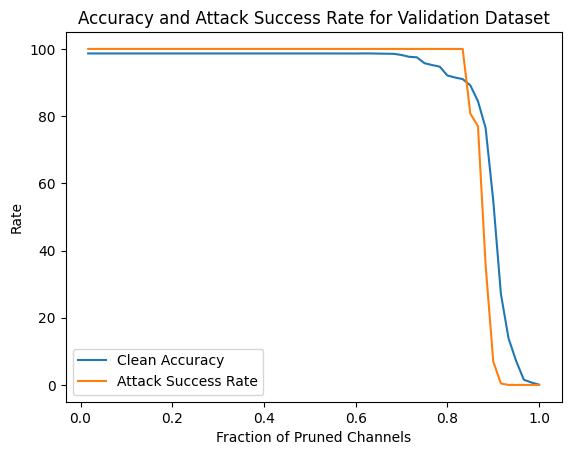

The attack success rate when the accuracy drops at least 30%:  6.954187234779596


In [7]:
def prune_model(model, channel_index, clean_data_acc, clean_x_test, cl_y_test, bd_x_test, bd_y_test, saved_model):
    weight_conv_3 = model.layers[5].get_weights()[0]
    bias_conv_3 = model.layers[5].get_weights()[1]

    weight_conv_3[:, :, :, channel_index] = 0
    bias_conv_3[channel_index] = 0

    model.layers[5].set_weights([weight_conv_3, bias_conv_3])

    cl_label_p = np.argmax(model.predict(clean_x_test), axis=1)
    clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test)) * 100

    for i, drop_threshold in enumerate([2, 4, 10]):
        if clean_data_acc - clean_accuracy >= drop_threshold and not saved_model[i]:
            print(f"The accuracy drops at least {drop_threshold}%, saved the model")
            model.save(f'model_X={drop_threshold}.h5')
            saved_model[i] = True

    bd_label_p = np.argmax(model.predict(bd_x_test), axis=1)
    attack_success_rate = np.mean(np.equal(bd_label_p, bd_y_test)) * 100

    return clean_accuracy, attack_success_rate

def prune_defense(model, clean_data_acc, clean_x_test, cl_y_test, bd_x_test, bd_y_test):
    model_copy = keras.models.clone_model(model)
    model_copy.set_weights(model.get_weights())

    layer_output = model_copy.get_layer('pool_3').output
    intermediate_model = keras.models.Model(inputs=model_copy.input, outputs=layer_output)
    intermediate_prediction = intermediate_model.predict(clean_x_test)
    channel_indices = np.argsort(np.mean(intermediate_prediction, axis=(0, 1, 2)))

    saved_model = np.zeros(3, dtype=bool)
    clean_acc = []
    asrate = []

    for channel_index in tqdm(channel_indices):
        clean_accuracy, attack_success_rate = prune_model(model_copy, channel_index, clean_data_acc, clean_x_test, cl_y_test, bd_x_test, bd_y_test, saved_model)
        clean_acc.append(clean_accuracy)
        asrate.append(attack_success_rate)

        print()
        print("The clean accuracy is:", clean_accuracy)
        print("The attack success rate is:", attack_success_rate)
        print("The pruned channel index is:", channel_index)

        keras.backend.clear_session()

    return clean_acc, asrate

def main():
    clean_x_test, cl_y_test = load_data(clean_data_path)
    bd_x_test, bd_y_test = load_data(poisoned_data_path)

    model = keras.models.load_model(model_path)

    clean_data_acc = 98.64899974019225

    # Call prune_defense to get clean_acc and asrate
    clean_acc, asrate = prune_defense(model, clean_data_acc, clean_x_test, cl_y_test, bd_x_test, bd_y_test)

    # Now you can use clean_acc and asrate for plotting or further analysis
    x_axis = np.arange(1, 61) / 60

    plt.plot(x_axis, clean_acc, label='Clean Accuracy')
    plt.plot(x_axis, asrate, label='Attack Success Rate')
    plt.legend()
    plt.xlabel("Fraction of Pruned Channels")
    plt.ylabel("Rate")
    plt.title("Accuracy and Attack Success Rate for Validation Dataset")
    plt.show()

    # Print attack success rate when the accuracy drops at least 30%
    index = np.where(np.array(clean_acc) <= (clean_data_acc - 30))[0]
    if index.size > 0:
        print("The attack success rate when the accuracy drops at least 30%: ", asrate[index[0]])
    else:
        print("No point found where clean accuracy drops at least 30%.")

if __name__ == '__main__':
    main()


The plots reveal a notable decline in the success rate of backdoor attacks as a substantial portion of neurons are pruned. Initially, the attack success rate remains consistently high, hovering around 100%, while the clean classification accuracy remains unaffected. This initial phase involves pruning neurons that are either zero or poorly activated, rendering them unused by both the honest network and the badnet.

As the pruning progresses, particularly when the number of channels removed is between 70% and 80% of their initial quantity, a discernible drop in clean classification accuracy is observed. This indicates that neurons responsible for classifying clean inputs are being pruned, while those activated by malicious inputs remain unaffected.

Beyond the 80% threshold of neurons removed, both the attack success rate and clean classification accuracy experience a decline. This suggests that, at this stage, neurons crucial for processing both clean and malicious inputs are being removed. In summary, the pruning process demonstrates nuanced effects on backdoor attack success and clean classification accuracy, emphasizing the intricate relationship between neuron removal and model behavior.

#### Combining the models

To create the repaired goodnet G, a model that correctly classifies clean inputs and identifies backdoored inputs as class N+1:

In [8]:
class G(keras.Model):
    def __init__(self, B, B_prime):
        super(G, self).__init__()
        self.B = B
        self.B_prime = B_prime

    def predict(self, data):
        predictions_B = np.argmax(self.B(data), axis=1)
        predictions_B_prime = np.argmax(self.B_prime(data), axis=1)

        combined_predictions = np.zeros(data.shape[0])

        for i in range(data.shape[0]):
            if predictions_B[i] == predictions_B_prime[i]:
                combined_predictions[i] = predictions_B[i]
            else:
                combined_predictions[i] = 1283

        return combined_predictions


#### Evaluating on the model

In [11]:
test_data_filename = '/kaggle/input/mlcybersec/lab3/data/cl/test.h5'
poisoned_test_data_filename = '/kaggle/input/mlcybersec/lab3/data/bd/bd_test.h5'
test_model_X_2_filename = '/kaggle/working/model_X=2.h5'
test_model_X_4_filename = '/kaggle/working/model_X=4.h5'
test_model_X_10_filename = '/kaggle/working/model_X=10.h5'

# Load test models
test_model_X_2 = keras.models.load_model(test_model_X_2_filename)
test_model_X_4 = keras.models.load_model(test_model_X_4_filename)
test_model_X_10 = keras.models.load_model(test_model_X_10_filename)

# Load test data
x_test_data, y_test_data = load_data(test_data_filename)
x_test_poisoned_data, y_test_poisoned_data = load_data(poisoned_test_data_filename)

# Display shapes of test data
print("x_test_data shape: ", x_test_data.shape)
print("x_test_poisoned data shape: ", x_test_poisoned_data.shape)


x_test_data shape:  (12830, 55, 47, 3)
x_test_poisoned data shape:  (12830, 55, 47, 3)


In [12]:

# Create G models
G_model_X_2 = G(model, test_model_X_2)
G_model_X_4 = G(model, test_model_X_4)
G_model_X_10 = G(model, test_model_X_10)



Check performance of the repaired models on the test data

In [15]:
# Evaluate the 2% drops model
cl_test_2_label_p = np.argmax(test_model_X_2.predict(x_test_data), axis=1)
clean_test_2_accuracy = np.mean(np.equal(cl_test_2_label_p, y_test_data)) * 100
print('2% drops model - Clean test data classification accuracy:', clean_test_2_accuracy)

bd_test_2_label_p = np.argmax(test_model_X_2.predict(x_test_poisoned_data), axis=1)
asr_2 = np.mean(np.equal(bd_test_2_label_p, y_test_poisoned_data)) * 100
print('2% drops model - Attack Success Rate:', asr_2)

# Evaluate the 4% drops model
cl_test_4_label_p = np.argmax(test_model_X_4.predict(x_test_data), axis=1)
clean_test_4_accuracy = np.mean(np.equal(cl_test_4_label_p, y_test_data)) * 100
print('4% drops model - Clean test data classification accuracy:', clean_test_4_accuracy)

bd_test_4_label_p = np.argmax(test_model_X_4.predict(x_test_poisoned_data), axis=1)
asr_4 = np.mean(np.equal(bd_test_4_label_p, y_test_poisoned_data)) * 100
print('4% drops model - Attack Success Rate:', asr_4)

# Evaluate the 10% drops model
cl_test_10_label_p = np.argmax(test_model_X_10.predict(x_test_data), axis=1)
clean_test_10_accuracy = np.mean(np.equal(cl_test_10_label_p, y_test_data)) * 100
print('10% drops model - Clean test data classification accuracy:', clean_test_10_accuracy)

bd_test_10_label_p = np.argmax(test_model_X_10.predict(x_test_poisoned_data), axis=1)
asr_10 = np.mean(np.equal(bd_test_10_label_p, y_test_poisoned_data)) * 100
print('10% drops model - Attack Success Rate:', asr_10)


401/401 [==============================] - 6s 15ms/step
2% drops model - Clean test data classification accuracy: 95.90023382696803
401/401 [==============================] - 6s 14ms/step
2% drops model - Attack Success Rate: 100.0
401/401 [==============================] - 6s 15ms/step
4% drops model - Clean test data classification accuracy: 92.29150428682775
401/401 [==============================] - 6s 14ms/step
4% drops model - Attack Success Rate: 99.98441153546376
401/401 [==============================] - 6s 14ms/step
10% drops model - Clean test data classification accuracy: 84.54403741231489
401/401 [==============================] - 6s 14ms/step
10% drops model - Attack Success Rate: 77.20966484801247


Summarizing the fixed models

In [22]:
# Create a DataFrame with the evaluation results
test_acc = [clean_test_2_accuracy, clean_test_4_accuracy, clean_test_10_accuracy]
attack_rate = [asr_2, asr_4, asr_10]
data = {
    "text_acc": test_acc,
    "attack_rate": attack_rate,
    "model": ["repaired_2%", "repaired_4%", "repaired_10%"]
}
df = pd.DataFrame(data)
df.set_index('model')

,text_acc,attack_rate
model,,
repaired_2%,95.900234,100.000000
repaired_4%,92.291504,99.984412
repaired_10%,84.544037,77.209665


Plot bar chart

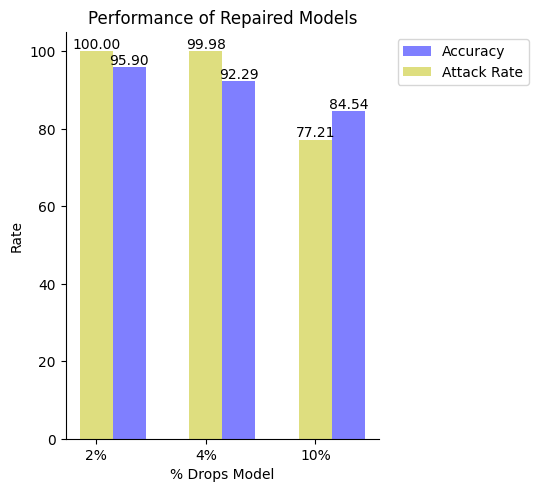

In [31]:
# Set parameters for the bar chart
opacity = 0.5
bar_width = 0.3

# Set labels for the axes
plt.xlabel('% Drops Model')
plt.ylabel('Rate')

# Set x-axis ticks and labels
plt.xticks(range(len(test_acc)), ('2%', '4%', '10%'))

# Create two sets of bars for accuracy and attack rate
bar1 = plt.bar(np.arange(len(test_acc)) + bar_width, test_acc, bar_width, align='center', alpha=opacity, color='b', label='Accuracy')
bar2 = plt.bar(range(len(attack_rate)), attack_rate, bar_width, align='center', alpha=opacity, color='y', label='Attack Rate')

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.02f}', ha='center', va='bottom')

# Add legend to the plot
plt.legend(bbox_to_anchor=(1.5, 1))

# Adjust layout and add title
plt.tight_layout()
plt.title('Performance of Repaired Models')

# Remove spines for better aesthetics
sns.despine()

# Display the plot
plt.show()


Evaluating the combined models (Goodnets)

In [30]:

G_cl_test_2_label_p = G_model_X_2.predict(x_test_data)
G_clean_test_2_accuracy = np.mean(np.equal(G_cl_test_2_label_p, y_test_data)) * 100
print('Combined 2% drops model - Clean test data Classification accuracy:', G_clean_test_2_accuracy)

G_bd_test_2_label_p = G_model_X_2.predict(x_test_poisoned_data)
G_asr_2 = np.mean(np.equal(G_bd_test_2_label_p, y_test_poisoned_data)) * 100
print('Combined 2% drops model - Attack Success Rate:', G_asr_2)

G_cl_test_4_label_p = G_model_X_4.predict(x_test_data)
G_clean_test_4_accuracy = np.mean(np.equal(G_cl_test_4_label_p, y_test_data)) * 100
print('Combined 4% drops model - Clean test data Classification accuracy:', G_clean_test_4_accuracy)

G_bd_test_4_label_p = G_model_X_4.predict(x_test_poisoned_data)
G_asr_4 = np.mean(np.equal(G_bd_test_4_label_p, y_test_poisoned_data)) * 100
print('Combined 4% drops model - Attack Success Rate:', G_asr_4)

G_cl_test_10_label_p = G_model_X_10.predict(x_test_data)
G_clean_test_10_accuracy = np.mean(np.equal(G_cl_test_10_label_p, y_test_data)) * 100
print('Combined 10% drops model - Clean test data Classification accuracy:', G_clean_test_10_accuracy)

G_bd_test_10_label_p = G_model_X_10.predict(x_test_poisoned_data)
G_asr_10 = np.mean(np.equal(G_bd_test_10_label_p, y_test_poisoned_data)) * 100
print('Combined 10% drops model - Attack Success Rate:', G_asr_10)


Combined 2% drops model - Clean test data Classification accuracy: 95.74434918160561
Combined 2% drops model - Attack Success Rate: 100.0
Combined 4% drops model - Clean test data Classification accuracy: 92.1278254091972
Combined 4% drops model - Attack Success Rate: 99.98441153546376
Combined 10% drops model - Clean test data Classification accuracy: 84.3335931410756
Combined 10% drops model - Attack Success Rate: 77.20966484801247


Creating a DataFrame for the combined models (Goodnets)

In [32]:

G_test_acc = [G_clean_test_2_accuracy, G_clean_test_4_accuracy, G_clean_test_10_accuracy]
G_attack_rate = [G_asr_2, G_asr_4, G_asr_10]
G_data = {
    "G_text_acc": G_test_acc,
    "G_attack_rate": G_attack_rate,
    "G_model": ["G_2%", "G_4%", "G_10%"]
}
G_df = pd.DataFrame(G_data)
G_df.set_index('G_model')
     


,G_text_acc,G_attack_rate
G_model,,
G_2%,95.744349,100.000000
G_4%,92.127825,99.984412
G_10%,84.333593,77.209665


Plot bar chart

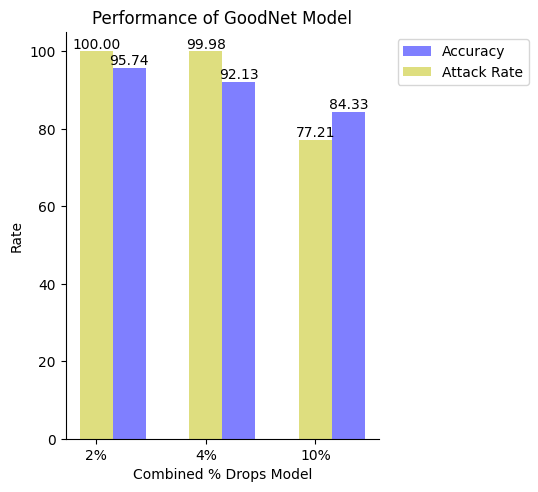

In [33]:
# Set parameters for the bar chart
opacity = 0.5
bar_width = 0.3

# Set labels for the axes
plt.xlabel('Combined % Drops Model')
plt.ylabel('Rate')

# Set x-axis ticks and labels
plt.xticks(range(len(G_test_acc)), ('2%', '4%', '10%'))

# Create two sets of bars for accuracy and attack rate
bar1 = plt.bar(np.arange(len(G_test_acc)) + bar_width, G_test_acc, bar_width, align='center', alpha=opacity, color='b', label='Accuracy')
bar2 = plt.bar(range(len(G_attack_rate)), G_attack_rate, bar_width, align='center', alpha=opacity, color='y', label='Attack Rate')

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.02f}', ha='center', va='bottom')

# Add legend to the plot
plt.legend(bbox_to_anchor=(1.5, 1))

# Adjust layout and add title
plt.tight_layout()
plt.title('Performance of GoodNet Model')

# Remove spines for better aesthetics
sns.despine()

# Display the plot
plt.show()


The effectiveness of the repairing models is noticeably limited, as they often fail to prevent the occurrence of the attack in the majority of cases.

We can also notice that the accuracy of Goodnet model is slightly lower than of repaired networks since it removes some labels that were misclassifie by badnet.